In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set aesthetics for plots
%matplotlib inline
sns.set_theme(style="whitegrid")

print("Setup complete. Libraries imported successfully.")


Setup complete. Libraries imported successfully.


In [2]:
!pip install pandas seaborn matplotlib openpyxl

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 50.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 43.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------------------------------------- 7.0/7.0 MB 43.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Splitting 'Blood Pressure' into numerical Systolic and Diastolic values
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Removing extra spaces in the Occupation column
df['Occupation'] = df['Occupation'].str.strip()

# Check the cleaned data
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90


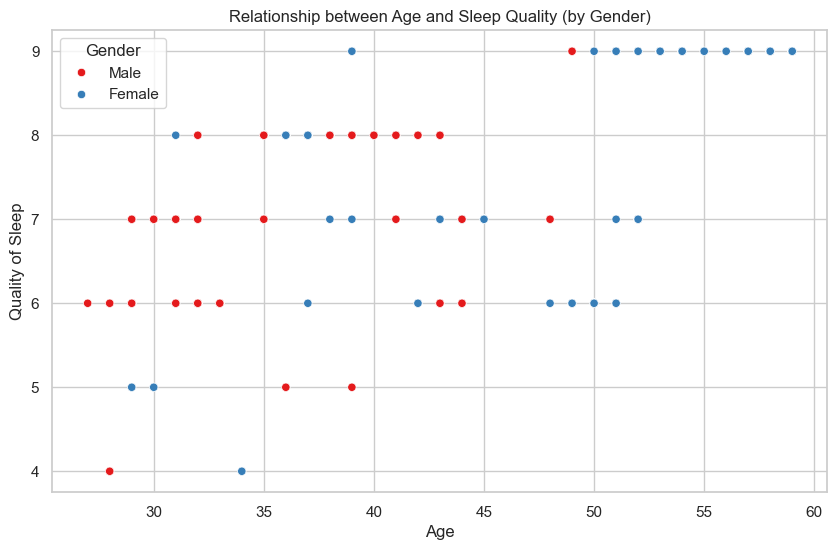

In [7]:
# Analyzing Age vs Sleep Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Quality of Sleep', hue='Gender', palette='Set1')
plt.title('Relationship between Age and Sleep Quality (by Gender)')
plt.show()

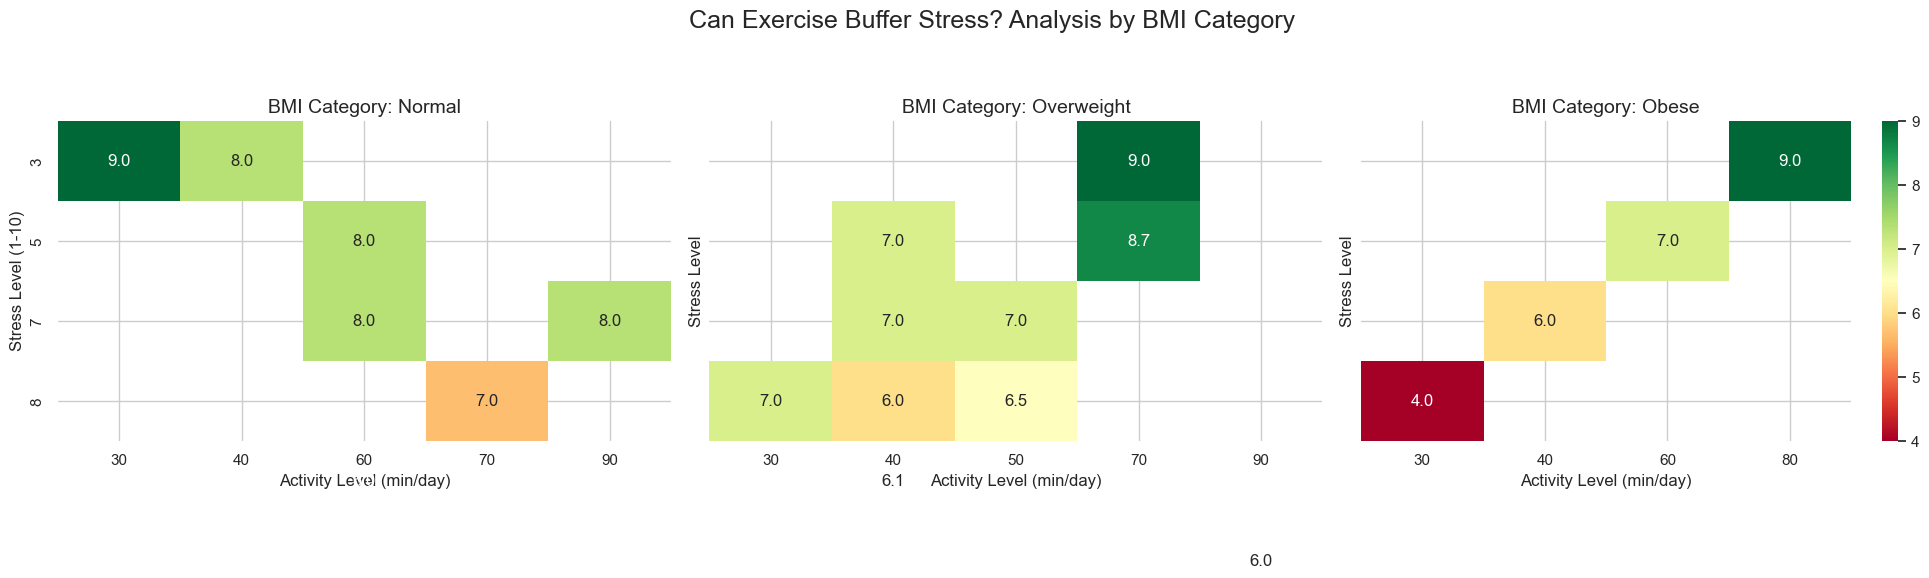

In [8]:
# 1. Prepare data: grouping activity and handling BMI categories
df['Activity_Group'] = (df['Physical Activity Level'] // 10) * 10
bmi_categories = ['Normal', 'Overweight', 'Obese']

# 2. Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

for i, bmi in enumerate(bmi_categories):
    # Filter data for each BMI category
    subset = df[df['BMI Category'] == bmi]
    
    if not subset.empty:
        # Create pivot table for the heatmap
        pivot = subset.pivot_table(index='Stress Level', 
                                   columns='Activity_Group', 
                                   values='Quality of Sleep', 
                                   aggfunc='mean')
        
        # Draw the heatmap
        sns.heatmap(pivot, annot=True, cmap='RdYlGn', fmt='.1f', ax=axes[i], cbar=(i==2))
        axes[i].set_title(f'BMI Category: {bmi}', fontsize=14)
        axes[i].set_xlabel('Activity Level (min/day)')
    else:
        axes[i].set_title(f'BMI Category: {bmi} (No Data)')

axes[0].set_ylabel('Stress Level (1-10)')
plt.suptitle('Can Exercise Buffer Stress? Analysis by BMI Category', fontsize=18, y=1.05)
plt.tight_layout()
plt.show()

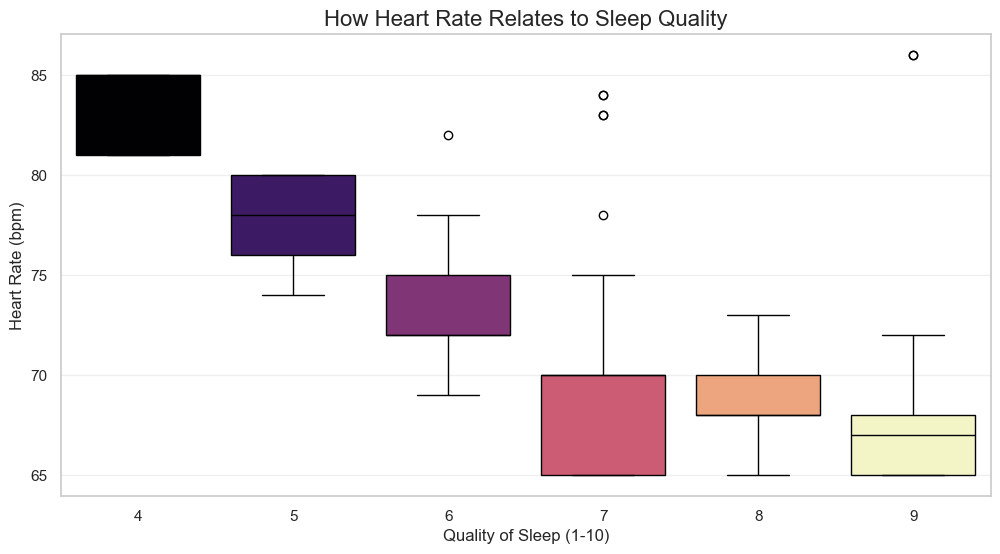

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

sns.boxplot(data=df, x='Quality of Sleep', y='Heart Rate', hue='Quality of Sleep', palette='magma', legend=False)

plt.title('How Heart Rate Relates to Sleep Quality', fontsize=16)
plt.xlabel('Quality of Sleep (1-10)', fontsize=12)
plt.ylabel('Heart Rate (bpm)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()


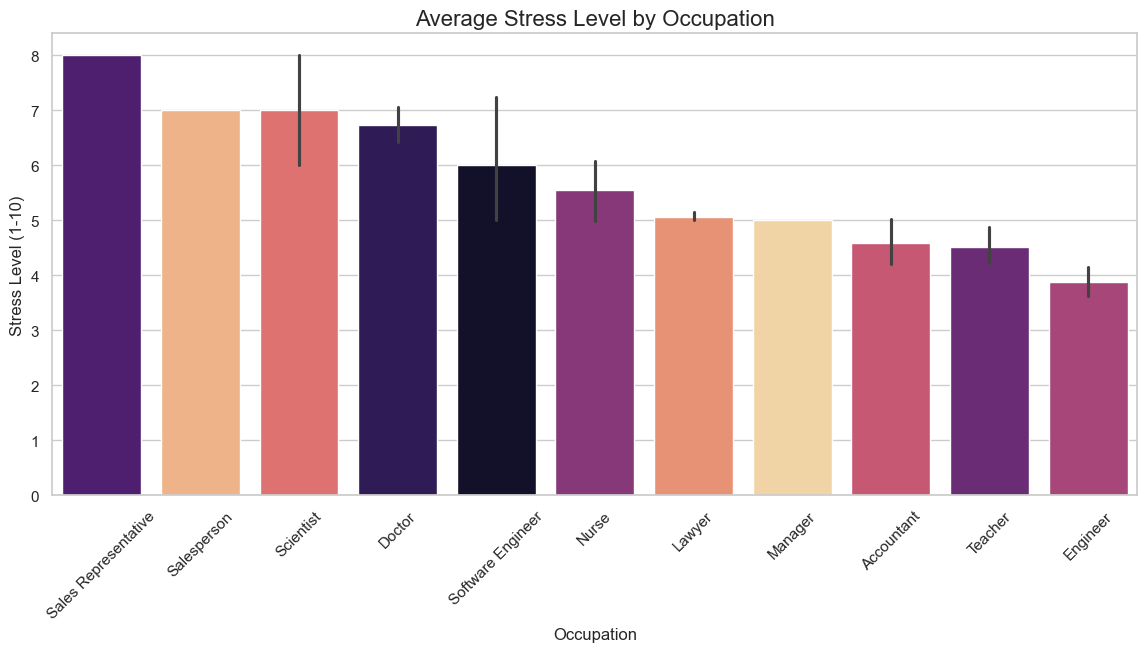

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Stress Level by Occupation
plt.figure(figsize=(14, 6))

# Ordering occupations by stress level
order = df.groupby('Occupation')['Stress Level'].mean().sort_values(ascending=False).index

sns.barplot(data=df, 
            x='Occupation', 
            y='Stress Level', 
            hue='Occupation', 
            palette='magma', 
            order=order, 
            legend=False)

plt.title('Average Stress Level by Occupation', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Stress Level (1-10)')
plt.show()

Final Research Conclusion: The Interplay of Lifestyle, Stress, and Health
This study clearly demonstrates that sleep quality is not a random metric but a result of a complex interaction between occupation, psychological state, and physiology.

1. Occupational Factor and the "Cost" of Career
The analysis identified that the field of activity is a primary source of stress:

High-Risk Zone: Sales roles (Sales Representatives, Salespersons) and Scientists exhibit critical stress levels ranging from 7.0 to 8.0.

Engineering Stability: Engineers proved to be the group with the lowest stress levels, serving as the benchmark for "healthy sleep" in this dataset.

Individual Variability: Software Engineers and Scientists show significant data variance, indicating that their well-being depends heavily on specific working conditions rather than just the job title.

2. Biological Feedback: Heart Rate as an Exhaustion Indicator
We confirmed that stress and poor sleep cause measurable physical strain on the cardiovascular system:

Heart in "Alarm Mode": At low sleep quality (4.0), the resting heart rate increases to 80–85 BPM, signaling the body’s inability to enter a deep recovery phase.

Healthy Recovery: Only when high sleep quality (8.0–9.0) is achieved does the heart rate drop to an optimal 65–70 BPM, allowing for proper cardiovascular rest.

3. BMI as a Vulnerability Coefficient
A person's weight determines their "margin of safety" when facing life's pressures:

Resilience (Normal): Individuals with a normal BMI show high resilience; even under significant stress (level 7), physical activity helps them maintain high sleep quality at 8.0.

Critical Decline (Obese): The "Obese" group recorded the lowest sleep quality in the entire study (4.0). This occurs when high stress is combined with low physical activity, proving that excess weight depletes the body's resources for managing psychological pressure.

4. The Role of Exercise: A Buffer, Not a Panacea
Physical activity does improve sleep metrics, especially in Overweight and Obese categories. However, the data shows that exercise cannot fully compensate for extreme stress. If stress levels reach 8/10, even 90 minutes of exercise fail to bring an individual back into the "green zone" of perfect sleep.

Summary: Achieving quality sleep requires more than just "moving more." A holistic approach is necessary: managing BMI and, most importantly, actively controlling workplace stress levels.